In [2]:
import numpy as np
import pandas as pd
import warnings
import shutil
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg



warnings.filterwarnings("ignore")

/home/stanislav/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
PATH_TO_IMGS = "CelebA_FR_Triplets/images/"


triplets_df = pd.read_csv("CelebA_FR_Triplets/triplets.csv")


def display_triplet(triplets_df, triplet_id):
    # Load the images


    triplet = triplets_df.iloc[triplet_id]

    
    anchor_img = mpimg.imread(PATH_TO_IMGS + triplet["anchor"])
    pos_img = mpimg.imread(PATH_TO_IMGS + triplet["pos"])
    neg_img = mpimg.imread(PATH_TO_IMGS + triplet["neg"])
    
    
    fig, axs = plt.subplots(1, 3, figsize=(12, 3))
    
    # Display each image
    axs[0].imshow(anchor_img)
    axs[0].set_title('Anchor Image')
    axs[0].axis('off') 
    
    axs[1].imshow(pos_img)
    axs[1].set_title('Positive Image')
    axs[1].axis('off')  
    
    axs[2].imshow(neg_img)
    axs[2].set_title('Negative Image')
    axs[2].axis('off')  
    
    plt.show()

In [4]:
triplets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16332 entries, 0 to 16331
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   anchor  16332 non-null  object
 1   id1     16332 non-null  int64 
 2   pos     16332 non-null  object
 3   id2     16332 non-null  int64 
 4   neg     16332 non-null  object
 5   id3     16332 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 765.7+ KB


In [5]:
triplets_df.head(10)

,anchor,id1,pos,id2,neg,id3
0,056279.jpg,1,108998.jpg,1,030848.jpg,496
1,024091.jpg,1,000023.jpg,1,093653.jpg,9313
2,122082.jpg,3,045833.jpg,3,188283.jpg,7200
3,110393.jpg,3,021233.jpg,3,178433.jpg,4643
4,101388.jpg,4,056784.jpg,4,105432.jpg,2988
5,143743.jpg,4,107918.jpg,4,079773.jpg,5029
6,093187.jpg,5,101049.jpg,5,141930.jpg,52
7,018771.jpg,5,093951.jpg,5,151909.jpg,6247
8,122677.jpg,6,003289.jpg,6,165740.jpg,4441
9,147869.jpg,6,122930.jpg,6,103819.jpg,6147


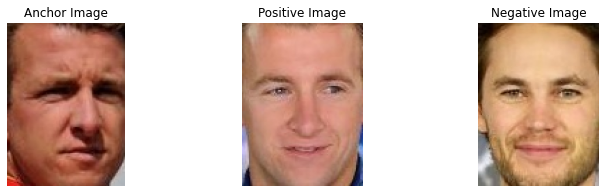

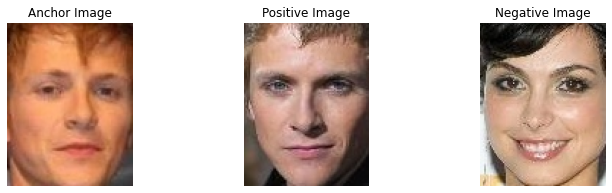

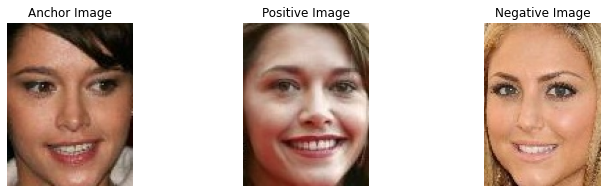

In [6]:
display_triplet(triplets_df, 1)

display_triplet(triplets_df, 3000)
display_triplet(triplets_df, 5000)

### Gender Classification

In [7]:
attrs_df = pd.read_csv("CelebAAttrs.csv")


gender_labels = attrs_df[["image_id", "Male"]]

train_gender_labels = gender_labels[:40_000]
validation_gender_labels = gender_labels[40_000 : 43_000]
test_gender_labels = gender_labels[43_000 : ]

# train_gender_labels = gender_labels[: 1000]
# validation_gender_labels = gender_labels[1000 : 1250]
# test_gender_labels = gender_labels[1250: 1500]





def copy_images_based_on_gender(df, source_dir, target_dir_male, target_dir_female):
    os.makedirs(target_dir_male, exist_ok=True)
    os.makedirs(target_dir_female, exist_ok=True)

    for index, row in df.iterrows():
        source_file = os.path.join(source_dir, row['image_id'])
        if row['Male'] == 1:
            target_file = os.path.join(target_dir_male, row['image_id'])
        else:
            target_file = os.path.join(target_dir_female, row['image_id'])
        shutil.copy(source_file, target_file)




#Preparing directories for


copy_images_based_on_gender(train_gender_labels, PATH_TO_IMGS, "train/male", "train/female")
copy_images_based_on_gender(validation_gender_labels, PATH_TO_IMGS, "validation/male", "validation/female")
copy_images_based_on_gender(validation_gender_labels, PATH_TO_IMGS, "test/male", "test/female")


,image_id,Male
0,083648.jpg,1
1,125778.jpg,1
2,160139.jpg,-1
3,046754.jpg,1
4,169197.jpg,-1
...,...,...
995,149850.jpg,-1
996,148014.jpg,-1
997,002685.jpg,-1
998,111057.jpg,1
